In [10]:
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
from collections import Counter


# Возможные элективы
electives = [
    "Data Science", "Python", "Machine Learning", "Маркетинг", "Управление проектами",
    "Бизнес-аналитика", "SQL", "Бизнес", "Дизайн", "Финансы", "UX/UI-дизайн",
    "Веб-разработка", "Искусственный интеллект", "Big Data", "Социология", "Психология"
]
data = []
for i in range(1, 101):
    chosen_electives = random.sample(electives, k=random.randint(1, 3))
    text = f"Я выбрал(а) элективы: {', '.join(chosen_electives)}."
    data.append({'student_id': i, 'text': text})
df = pd.DataFrame(data)

In [11]:
df.to_csv('generated_electives.csv', index=False, encoding='utf-8')
print(df.head())

   student_id                                               text
0           1                   Я выбрал(а) элективы: Маркетинг.
1           2     Я выбрал(а) элективы: Искусственный интеллект.
2           3         Я выбрал(а) элективы: Психология, Финансы.
3           4  Я выбрал(а) элективы: Финансы, Маркетинг, Псих...
4           5  Я выбрал(а) элективы: Big Data, Веб-разработка...


In [14]:
def extract_electives(text):
    found = []
    for elective in electives:
        if elective.lower() in text.lower():
            found.append(elective)
    return found
df['extracted_electives'] = df['text'].apply(extract_electives)

In [16]:
all_electives = sum(df['extracted_electives'], []) 
counter = Counter(all_electives)

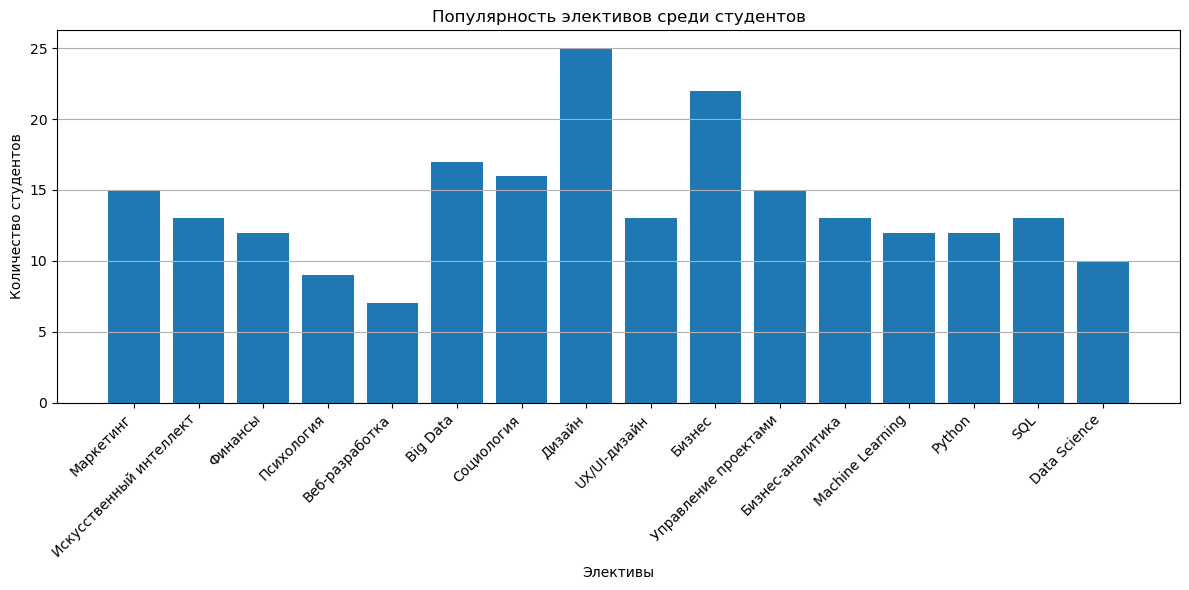

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Элективы')
plt.ylabel('Количество студентов')
plt.title('Популярность элективов среди студентов')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
top5 = counter.most_common(5)
top5_df = pd.DataFrame(top5, columns=['Электив', 'Количество студентов'])
print(top5_df)

      Электив  Количество студентов
0      Дизайн                    25
1      Бизнес                    22
2    Big Data                    17
3  Социология                    16
4   Маркетинг                    15


Студенты чаще всего выбирали элективы, связанные с программированием, анализом данных и машинным обучением. Наибольшую популярность получили Python, Data Science, Machine Learning, SQL и Маркетинг. Это показывает высокий интерес к техническим и аналитическим направлениям обучения.